In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency, randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\train.csv")
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [3]:
df = pd.DataFrame(df)
testdf = pd.DataFrame(testdf)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.drop(columns=["PassengerId"])

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.Survived.value_counts(normalize=True)
#We know now that the data is mildly imbalanced. 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.Age = df.Age.fillna(df.Age.median())

In [10]:
df.Cabin = df.Cabin.fillna(df.Cabin.mode()[0])

In [11]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: xlabel='Pclass', ylabel='Survived'>

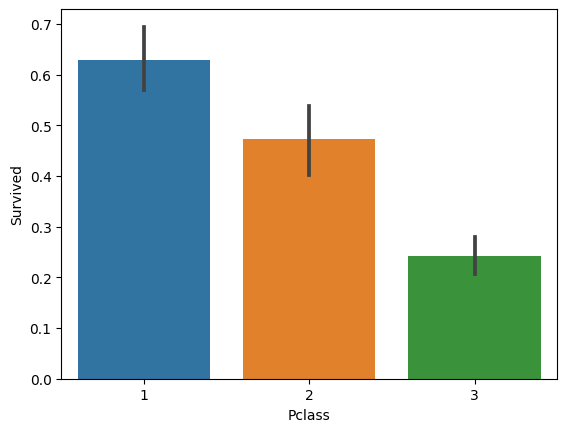

In [13]:
sns.barplot(x = df.Pclass, y= df.Survived)

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

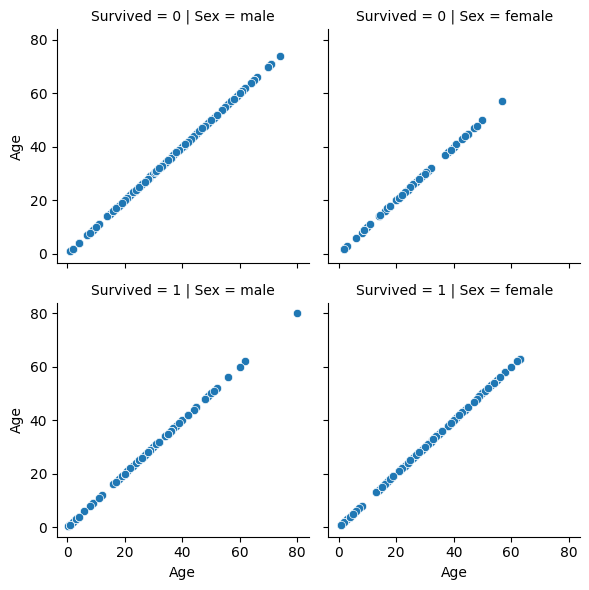

In [14]:
g= sns.FacetGrid(df, col= "Sex", row= "Survived")
g.map(sns.scatterplot, "Age", "Age")
#here we can see that oldest woman on deck was at most 63-ish, and they survived. Age is not an indicator when it comes to women.

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Fare'>

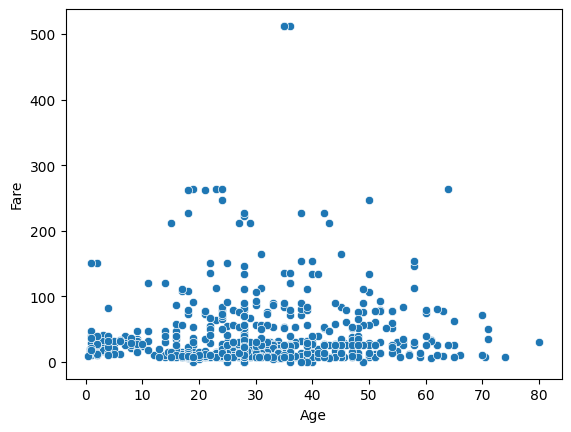

In [15]:
sns.scatterplot(df, x = "Age", y= "Fare")
#There is no correlation between Age and the money paid for the ticket.

<Axes: xlabel='Survived'>

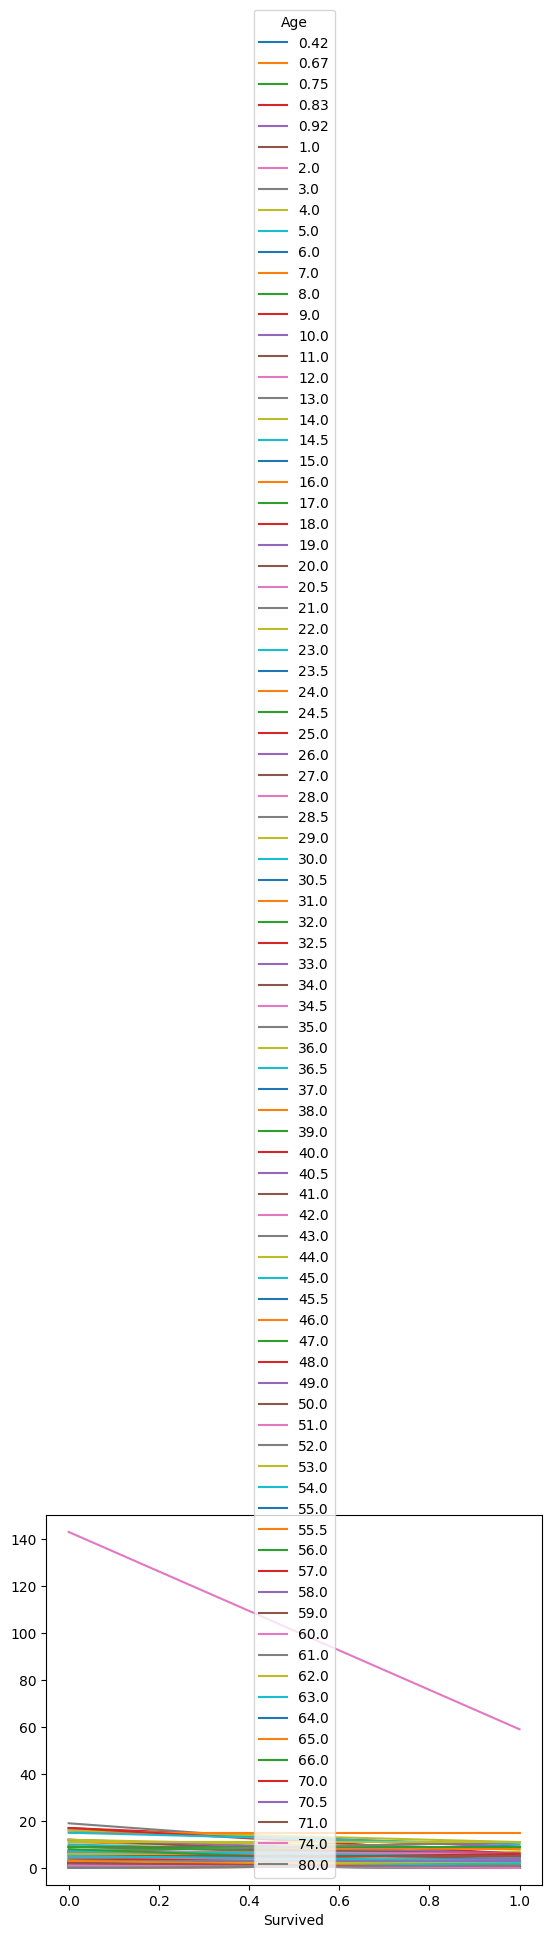

In [16]:
crosstab  = pd.crosstab(df["Survived"], df["Age"])
crosstab.plot()

In [17]:
bins = [0, 2, 8, 15, 23, 35, 48, 65, 80]

In [18]:
labels = ["baby", "young child", "older child", "teenager", "young adult", "adult", "older adult", "elderly"]

In [19]:
df["AgeCategory"] = pd.cut(x= df["Age"], bins=bins, labels=labels)

In [20]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,teenager
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,young adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,young adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenager
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,young adult
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adult


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fare', ylabel='Pclass'>

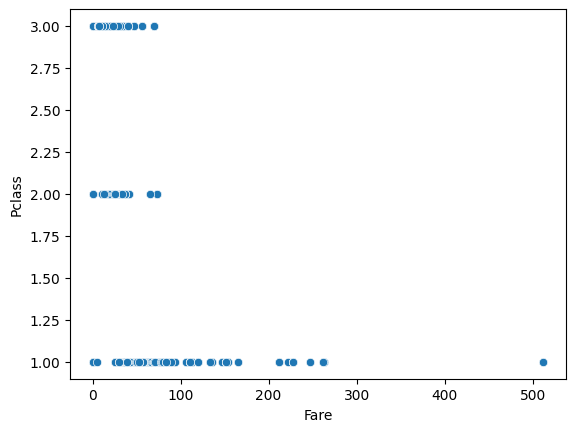

In [21]:
sns.scatterplot(df, x= "Fare", y="Pclass")
#While the fare for 3rd and 2nd class can only go up to 100$, 1st class fares can go upto 500$+.

In [22]:
df = df.drop("Age", axis=1)

In [23]:
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S,teenager
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S,young adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,young adult
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,B96 B98,S,young adult
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,teenager
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,B96 B98,S,young adult
889,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,young adult


In [24]:
df["family"] = df["SibSp"] + df["Parch"]
df = df.drop(columns=["Parch", "SibSp"])
df

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeCategory,family
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,B96 B98,S,teenager,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,adult,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,B96 B98,S,young adult,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,young adult,1
4,0,3,"Allen, Mr. William Henry",male,373450,8.0500,B96 B98,S,young adult,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,211536,13.0000,B96 B98,S,young adult,0
887,1,1,"Graham, Miss. Margaret Edith",female,112053,30.0000,B42,S,teenager,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,23.4500,B96 B98,S,young adult,3
889,1,1,"Behr, Mr. Karl Howell",male,111369,30.0000,C148,C,young adult,0


In [25]:
df["Title"] =  df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
df = df.drop(columns=["Name"])

In [26]:
categoric = []
numeric = []
for i in df.columns:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(df[i])
    if df[i].dtypes == "object" or df[i].dtypes == "category":
        categoric.append(df[i])
    

In [27]:
categoric = pd.DataFrame(categoric).T
categoric

,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,Mr
1,female,PC 17599,C85,C,adult,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,female,113803,C123,S,young adult,Mrs
4,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,Rev
887,female,112053,B42,S,teenager,Miss
888,female,W./C. 6607,B96 B98,S,young adult,Miss
889,male,111369,C148,C,young adult,Mr


In [28]:
numeric = pd.DataFrame(numeric).T
numeric

,Survived,Pclass,Fare,family
0,0.0,3.0,7.2500,1.0
1,1.0,1.0,71.2833,1.0
2,1.0,3.0,7.9250,0.0
3,1.0,1.0,53.1000,1.0
4,0.0,3.0,8.0500,0.0
...,...,...,...,...
886,0.0,2.0,13.0000,0.0
887,1.0,1.0,30.0000,0.0
888,0.0,3.0,23.4500,3.0
889,1.0,1.0,30.0000,0.0


In [29]:
corr_matr = numeric.corr()

<Axes: >

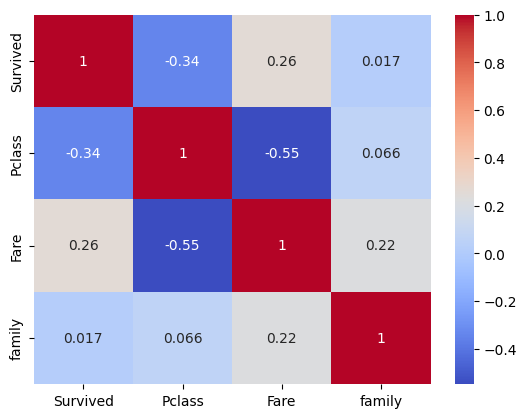

In [30]:
sns.heatmap(corr_matr, annot=True, cmap="coolwarm")

In [31]:
for col in corr_matr.columns: 
    for index in corr_matr.index: #here we look at each index of each column of corr_matr
        if col != "Survived" and index != "Survived":
            corr_value = corr_matr.loc[index,col] #and here by using .loc we can easily access the values of those index-column pairs
            if col != index: #we wrote this code because we dont want to delete the "1" of each index=column pairs and we dont want to delete a column-index pair if they have high correlation with label
                if corr_value < -0.70 or corr_value > 0.70:
                    if col in numeric.columns and index in numeric.columns:
                        if numeric[col].std() < numeric[index].std():
                            numeric.drop(col, axis=1, inplace=True)
                        else:
                            numeric.drop(index, axis=1, inplace=True)

In [32]:
numeric

,Survived,Pclass,Fare,family
0,0.0,3.0,7.2500,1.0
1,1.0,1.0,71.2833,1.0
2,1.0,3.0,7.9250,0.0
3,1.0,1.0,53.1000,1.0
4,0.0,3.0,8.0500,0.0
...,...,...,...,...
886,0.0,2.0,13.0000,0.0
887,1.0,1.0,30.0000,0.0
888,0.0,3.0,23.4500,3.0
889,1.0,1.0,30.0000,0.0


In [33]:
lstofsignificant = []
for i in categoric.columns:
    if i != "Survived":
        contingency_table = pd.crosstab(categoric[i], numeric["Survived"])
        stat, p, dof, expected = chi2_contingency(contingency_table)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Not significant')
        else:
            print('Significant')
            lstofsignificant.append(categoric[i])

lstofsignificant = pd.DataFrame(lstofsignificant).T
lstofsignificant

stat=260.717, p=0.000
Significant
stat=766.570, p=0.012
Significant
stat=232.754, p=0.000
Significant
stat=25.964, p=0.000
Significant


stat=24.276, p=0.001
Significant
stat=300.023, p=0.000
Significant


,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,Mr
1,female,PC 17599,C85,C,adult,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,female,113803,C123,S,young adult,Mrs
4,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,Rev
887,female,112053,B42,S,teenager,Miss
888,female,W./C. 6607,B96 B98,S,young adult,Miss
889,male,111369,C148,C,young adult,Mr


In [34]:
finaldf = pd.concat([numeric, lstofsignificant], axis=1)

In [35]:
finaldf

,Survived,Pclass,Fare,family,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,0.0,3.0,7.2500,1.0,male,A/5 21171,B96 B98,S,teenager,Mr
1,1.0,1.0,71.2833,1.0,female,PC 17599,C85,C,adult,Mrs
2,1.0,3.0,7.9250,0.0,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,1.0,1.0,53.1000,1.0,female,113803,C123,S,young adult,Mrs
4,0.0,3.0,8.0500,0.0,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,13.0000,0.0,male,211536,B96 B98,S,young adult,Rev
887,1.0,1.0,30.0000,0.0,female,112053,B42,S,teenager,Miss
888,0.0,3.0,23.4500,3.0,female,W./C. 6607,B96 B98,S,young adult,Miss
889,1.0,1.0,30.0000,0.0,male,111369,C148,C,young adult,Mr
